In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [35]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [36]:
df ={"x1":x[:,0],"x2":x[:,1],"y":y}

In [37]:
dataset = pd.DataFrame(df)

In [38]:
dataset.head(3)

,x1,x2,y
0,-0.928317,0.005058,0
1,1.303645,-0.191760,1
2,0.321379,0.920724,0


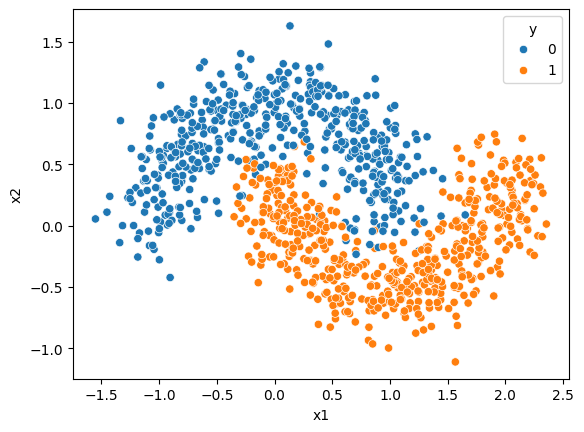

In [39]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [43]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [44]:
from sklearn.model_selection import train_test_split

In [99]:
x_train , x_test , y_train , y_test =train_test_split(x_a,y_a,test_size=0.2,random_state=41)

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [101]:
dt=DecisionTreeClassifier()

In [102]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 ,dt.score(x_test,y_test)*100

(100.0, 95.0)

In [103]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 ,sv.score(x_test,y_test)*100

(96.625, 96.0)

In [104]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100 ,gnb.score(x_test,y_test)*100

(88.375, 85.5)

In [105]:
from sklearn.ensemble import VotingClassifier

In [106]:
li =[("dt1,",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [116]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('dt1,', ...), ('sv1', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'hard'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [117]:
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(97.5, 96.0)

In [114]:
prd = {"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [115]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,0,0,1,0
197,0,1,0,0
198,1,1,1,1
